<a href="https://colab.research.google.com/github/surabhipandey18/Deep-Learning/blob/main/Example_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
class SimpleGRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleGRUModel, self).__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])
        return out

In [3]:
#load file
df = pd.read_csv('GOOG.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [4]:
X = df[['open', 'high', 'low', 'adjClose', 'adjHigh', 'volume', 'adjOpen', 'adjVolume']].values
y = df['close'].values.reshape(-1, 1)

In [5]:
#split train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#doing min-max scaling
x_scaler = MinMaxScaler()
X_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

y_scaler = MinMaxScaler()
y_scaler.fit(y_train.reshape(-1, 1))
y_train_scaled = y_scaler.transform(y_train.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1))

In [7]:
#create sequences
def create_sequences(X, y, seq_length=20):
    xs, ys = [], []
    for i in range(len(X) - seq_length):
        xs.append(X[i:i+seq_length])
        ys.append(y[i+seq_length])
    return np.array(xs), np.array(ys)

seq_length = 20
X_seq, y_seq = create_sequences(X_scaled, y_train_scaled, seq_length=seq_length)


In [8]:
# Convert data to PyTorch tensors
X_train_tensor = torch.from_numpy(X_scaled).float()
X_train_tensor = X_train_tensor.unsqueeze(1)
X_test_tensor = torch.from_numpy(X_test_scaled).float()
X_test_tensor = X_test_tensor.unsqueeze(1)
y_train_tensor = torch.from_numpy(y_train_scaled).float()
y_test_tensor = torch.from_numpy(y_test_scaled).float()

In [14]:
#model
model = SimpleGRUModel(input_dim = 8, hidden_dim = 128, output_dim = 1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [15]:
epoch_losses = []


for epoch in range(150):
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch_losses.append(loss.item())
    print(f'Epoch {epoch} loss: {loss.item():.3f}')

Epoch 0 loss: 0.110
Epoch 1 loss: 0.101
Epoch 2 loss: 0.091
Epoch 3 loss: 0.083
Epoch 4 loss: 0.075
Epoch 5 loss: 0.067
Epoch 6 loss: 0.060
Epoch 7 loss: 0.053
Epoch 8 loss: 0.047
Epoch 9 loss: 0.041
Epoch 10 loss: 0.036
Epoch 11 loss: 0.031
Epoch 12 loss: 0.027
Epoch 13 loss: 0.023
Epoch 14 loss: 0.020
Epoch 15 loss: 0.017
Epoch 16 loss: 0.015
Epoch 17 loss: 0.013
Epoch 18 loss: 0.012
Epoch 19 loss: 0.011
Epoch 20 loss: 0.010
Epoch 21 loss: 0.010
Epoch 22 loss: 0.010
Epoch 23 loss: 0.010
Epoch 24 loss: 0.010
Epoch 25 loss: 0.011
Epoch 26 loss: 0.011
Epoch 27 loss: 0.011
Epoch 28 loss: 0.011
Epoch 29 loss: 0.011
Epoch 30 loss: 0.010
Epoch 31 loss: 0.010
Epoch 32 loss: 0.009
Epoch 33 loss: 0.009
Epoch 34 loss: 0.008
Epoch 35 loss: 0.008
Epoch 36 loss: 0.007
Epoch 37 loss: 0.007
Epoch 38 loss: 0.006
Epoch 39 loss: 0.006
Epoch 40 loss: 0.005
Epoch 41 loss: 0.005
Epoch 42 loss: 0.005
Epoch 43 loss: 0.004
Epoch 44 loss: 0.004
Epoch 45 loss: 0.004
Epoch 46 loss: 0.004
Epoch 47 loss: 0.004
Ep

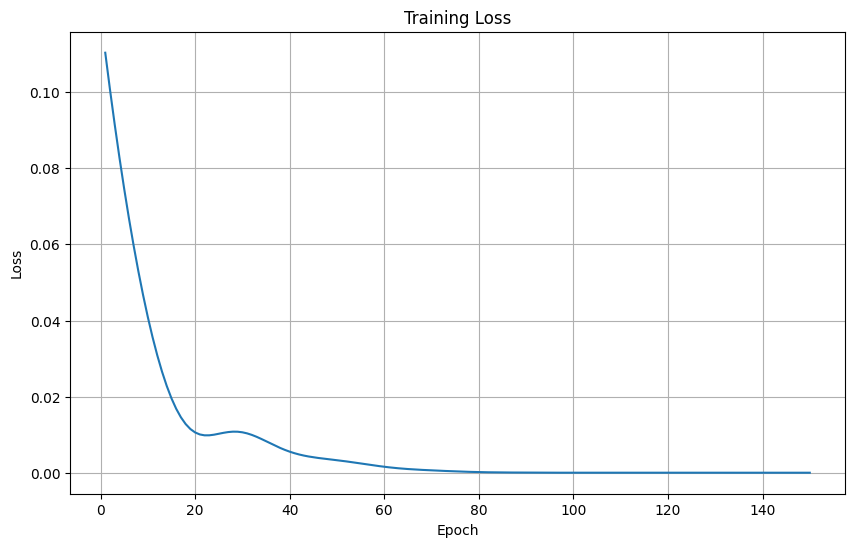

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 151), epoch_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.show()

In [17]:
model.eval()

SimpleGRUModel(
  (gru): GRU(8, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
)

In [18]:
pred_scaled = model(X_test_tensor).detach().cpu().numpy()
y_test_np = y_test_tensor.detach().cpu().numpy()
pred_orig = y_scaler.inverse_transform(pred_scaled)
target_orig = y_scaler.inverse_transform(y_test_np)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(target_orig, pred_orig))
print("RMSE:", rmse)

RMSE: 13.608014359544537
